## import Library

In [46]:
import numpy as np
import matplotlib.pyplot as plt 
import csv

## IMPORT DATA SET

In [47]:
data = []

# read the file 
with open("./raw_data.csv", "r") as csvfile:
    file_reader = csv.reader(csvfile)

    for row in file_reader:
        data.append(row)

# change data into numpy array
data = np.array(data)

In [48]:
data
data.shape
np.savetxt("raw_data.npy",data, fmt="%s", delimiter=",")

In [49]:
header = data[0, :]
values = data[1:, :]
print("Header:\n", header, "\n\n Values:\n", values)

Header:
 ['MSN' 'YYYYMM' 'Value' 'Column_Order' 'Description' 'Unit'] 

 Values:
 [['CLETPUS' '194913' '135451.32' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '195013' '154519.994' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '195113' '185203.657' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ...
 ['ELETPUS' '202209' '350919.559' '13'
  'Electricity Net Generation Total (including from sources not shown), All Sectors'
  'Million Kilowatthours']
 ['ELETPUS' '202210' '314048.288' '13'
  'Electricity Net Generation Total (including from sources not shown), All Sectors'
  'Million Kilowatthours']
 ['ELETPUS' '202211' '323198.745' '13'
  'Electricity Net Generation Total (including from sources not shown), All Sectors'
  'Million Kilowatthours']]


## Extract The Nuclear_Electric_power Data

In [55]:
nuclear_cond = values[:,4] == "Electricity Net Generation From Nuclear Electric Power, All Sectors"
print(nuclear_cond)
nuclear_data = values[nuclear_cond]
print(nuclear_data)
nuclear_data.shape

[False False False ... False False False]
[['NUETPUS' '194913' '0' '5'
  'Electricity Net Generation From Nuclear Electric Power, All Sectors'
  'Million Kilowatthours']
 ['NUETPUS' '195013' '0' '5'
  'Electricity Net Generation From Nuclear Electric Power, All Sectors'
  'Million Kilowatthours']
 ['NUETPUS' '195113' '0' '5'
  'Electricity Net Generation From Nuclear Electric Power, All Sectors'
  'Million Kilowatthours']
 ...
 ['NUETPUS' '202209' '63733.186' '5'
  'Electricity Net Generation From Nuclear Electric Power, All Sectors'
  'Million Kilowatthours']
 ['NUETPUS' '202210' '58945.383' '5'
  'Electricity Net Generation From Nuclear Electric Power, All Sectors'
  'Million Kilowatthours']
 ['NUETPUS' '202211' '62041.287' '5'
  'Electricity Net Generation From Nuclear Electric Power, All Sectors'
  'Million Kilowatthours']]


(672, 6)

In [57]:
nuclear_data

array([['NUETPUS', '194913', '0', '5',
        'Electricity Net Generation From Nuclear Electric Power, All Sectors',
        'Million Kilowatthours'],
       ['NUETPUS', '195013', '0', '5',
        'Electricity Net Generation From Nuclear Electric Power, All Sectors',
        'Million Kilowatthours'],
       ['NUETPUS', '195113', '0', '5',
        'Electricity Net Generation From Nuclear Electric Power, All Sectors',
        'Million Kilowatthours'],
       ...,
       ['NUETPUS', '202209', '63733.186', '5',
        'Electricity Net Generation From Nuclear Electric Power, All Sectors',
        'Million Kilowatthours'],
       ['NUETPUS', '202210', '58945.383', '5',
        'Electricity Net Generation From Nuclear Electric Power, All Sectors',
        'Million Kilowatthours'],
       ['NUETPUS', '202211', '62041.287', '5',
        'Electricity Net Generation From Nuclear Electric Power, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

## Saving File

In [ ]:
np.savetxt("nuclear_energy.npy", natural_gas_data, fmt="%s", delimiter=",")
np.savetxt("nuclear_energy.csv", natural_gas_data, fmt="%s", delimiter=",")

## EDA-Exploratory Data Analysis

In [58]:
# Return the shape of my data
print("Row: ",nuclear_data.shape[0])
print("colum: ",nuclear_data.shape[1])

Row:  672
colum:  6


## Data Cleaning

in the value column, some data point include "Not Availabe" which means energy were not recorded under nuclear_data for that year.

In [59]:
nuclear_data[:,1]

array(['194913', '195013', '195113', '195213', '195313', '195413',
       '195513', '195613', '195713', '195813', '195913', '196013',
       '196113', '196213', '196313', '196413', '196513', '196613',
       '196713', '196813', '196913', '197013', '197113', '197213',
       '197301', '197302', '197303', '197304', '197305', '197306',
       '197307', '197308', '197309', '197310', '197311', '197312',
       '197313', '197401', '197402', '197403', '197404', '197405',
       '197406', '197407', '197408', '197409', '197410', '197411',
       '197412', '197413', '197501', '197502', '197503', '197504',
       '197505', '197506', '197507', '197508', '197509', '197510',
       '197511', '197512', '197513', '197601', '197602', '197603',
       '197604', '197605', '197606', '197607', '197608', '197609',
       '197610', '197611', '197612', '197613', '197701', '197702',
       '197703', '197704', '197705', '197706', '197707', '197708',
       '197709', '197710', '197711', '197712', '197713', '1978

In [62]:
available_mask = nuclear_data[:,2] != "Not Available"
nuclear_data =nuclear_data[available_mask]

## Save Clean Nuclear_Gas Data

In [63]:
np.savetxt("nuclear_data.csv", nuclear_data, fmt="%s", delimiter=",")

In [64]:
annual_mask = np.array([x[-2:] == '13' for x in nuclear_data[:,1]])

In [65]:
annual_nuclear_data = nuclear_data[annual_mask]

In [66]:
annual_nuclear_data

array([['NUETPUS', '194913', '0', '5',
        'Electricity Net Generation From Nuclear Electric Power, All Sectors',
        'Million Kilowatthours'],
       ['NUETPUS', '195013', '0', '5',
        'Electricity Net Generation From Nuclear Electric Power, All Sectors',
        'Million Kilowatthours'],
       ['NUETPUS', '195113', '0', '5',
        'Electricity Net Generation From Nuclear Electric Power, All Sectors',
        'Million Kilowatthours'],
       ['NUETPUS', '195213', '0', '5',
        'Electricity Net Generation From Nuclear Electric Power, All Sectors',
        'Million Kilowatthours'],
       ['NUETPUS', '195313', '0', '5',
        'Electricity Net Generation From Nuclear Electric Power, All Sectors',
        'Million Kilowatthours'],
       ['NUETPUS', '195413', '0', '5',
        'Electricity Net Generation From Nuclear Electric Power, All Sectors',
        'Million Kilowatthours'],
       ['NUETPUS', '195513', '0', '5',
        'Electricity Net Generation From Nuclear 

## Analysis

In [67]:
np.array([x[-2:] == '13' for x in nuclear_data[:,1]])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

## Total Energy Generated

In [68]:
all_energy = nuclear_data[:,2].astype(float)

In [69]:
print("The total nuclear_data energy generated in USA between 1986 - 2021: {} killowatt per hours".format(all_energy.sum()))

The total nuclear_data energy generated in USA between 1986 - 2021: 58669479.237 killowatt per hours


## The Mean Of Nuclear Energy Generated

In [70]:
all_energy.mean()

87305.77267410715

## The Standard Deviation

In [71]:
all_energy.std()

155564.6746090216

In [72]:
all_energy.max()

809409.262

In [73]:
all_energy.min()

0.0

In [74]:
y =nuclear_data[:,1] # year
x = nuclear_data[:,2] # energy

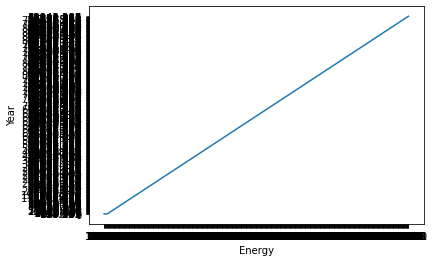

In [75]:
plt.plot(y,x)
plt.ylabel("Year")
plt.xlabel("Energy")
plt.show()